In [16]:
from CLOGP import MGmB, MGE, MGE_Ordenado, calculo_S, batche, calcula_p_chapeu, calculo_accuracy, calcular_erro, sigmoid, sinal
from CLogDKPd import threshold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
# carregar dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
def exhaustive_code(k):
    segment_length = 2**(k-1) - 1
    codes = []
    # Vamos admitir que irá sempre receber k=4
    codes.append([1]*segment_length)

    row = []
    segment_length = 2**(k-2)
    row.extend([0] * segment_length)
    row.extend([1] * (segment_length - 1))
    codes.append(row)
    
    row = []
    segment_length = 2**(k-3)
    row.extend([0] * segment_length)
    row.extend([1] * segment_length)
    row.extend([0] * segment_length)
    row.extend([1] * (segment_length - 1))
    codes.append(row)

    codes.append([0,1,0,1,0,1,0])
    
    return codes

k = 4
code = exhaustive_code(k)
for row in code:
    print(row)

[1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 1, 1, 0, 0, 1]
[0, 1, 0, 1, 0, 1, 0]


In [18]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

In [19]:
train_filter = np.where((y_train == 0) | (y_train == 1) | (y_train == 2) | (y_train == 3))
test_filter = np.where((y_test == 0) | (y_test == 1) | (y_test == 2) | (y_test == 3))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

In [20]:
x_train_filter, y_train_filter = select_first_n_per_class(x_train, y_train, 100)
x_test_filter, y_test_filter = select_first_n_per_class(x_test, y_test, 100)

x_train_array = x_train_filter.reshape((len(x_train_filter), 784))
x_test_array = x_test_filter.reshape((len(x_test_filter), 784))
x_train_filter = x_train_array.astype('float32')
x_test_filter = x_test_array.astype('float32')

x_train_filter = np.hstack((np.ones((x_train_filter.shape[0], 1)), x_train_filter))
x_test_filter = np.hstack((np.ones((x_test_filter.shape[0], 1)), x_test_filter))

In [21]:
'''
indices = np.random.permutation(len(x_train_filter))
x_train_filter = x_train_filter[indices]
y_train_filter = y_train_filter[indices]
'''

'\nindices = np.random.permutation(len(x_train_filter))\nx_train_filter = x_train_filter[indices]\ny_train_filter = y_train_filter[indices]\n'

X shape: (400, 785)
[371]
[388]
[10]
[52]
[380]
[19]
[259]
[263]
[243]
[24]
[174]
[226]
[29]
[18]
[159]
[3]
[129]
[86]
[36]
[387]
[237]
[331]
[0]
[179]
[14]
[111]
[77]
[197]
[394]
[344]
[232]
[155]
[49]
[91]
[31]
[118]
[234]
[9]
[234]
[6]
[352]
[215]
[216]
[302]
[285]
[359]
[218]
[287]
[100]
[289]
[67]
[211]
[248]
[27]
[162]
[328]
[198]
[272]
[210]
[151]
[371]
[103]
[0]
[228]
[221]
[231]
[251]
[42]
[164]
[308]
[9]
[266]
[53]
[150]
[387]
[206]
[167]
[202]
[59]
[165]
[91]
[74]
[46]
[399]
[331]
[387]
[180]
[243]
[98]
[348]
[193]
[133]
[180]
[317]
[288]
[188]
[194]
[286]
[18]
[128]
[187]
[346]
[387]
[140]
[27]
[104]
[162]
[96]
[96]
[20]
[265]
[272]
[36]
[232]
[110]
[349]
[226]
[48]
[70]
[287]
[377]
[101]
[196]
[364]
[68]
[374]
[235]
[171]
[364]
[232]
[381]
[242]
[33]
[18]
[63]
[54]
[92]
[224]
[258]
[8]
[34]
[293]
[335]
[146]
[142]
[290]
[103]
[191]
[145]
[362]
[205]
[359]
[204]
[0]
[247]
[178]
[230]
[186]
[234]
[119]
[296]
[176]
[166]
[152]
[166]
[60]
[149]
[284]
[161]
[209]
[126]
[56]
[17

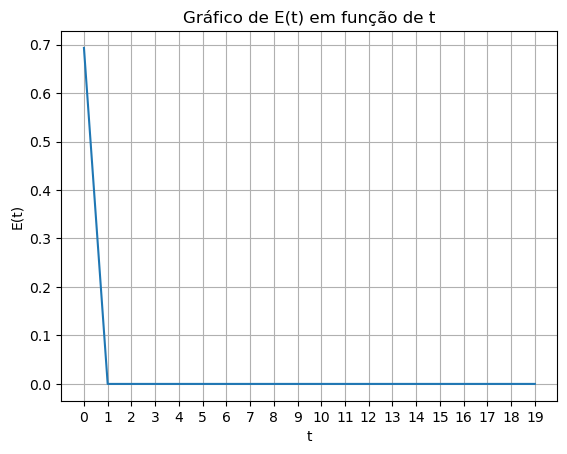

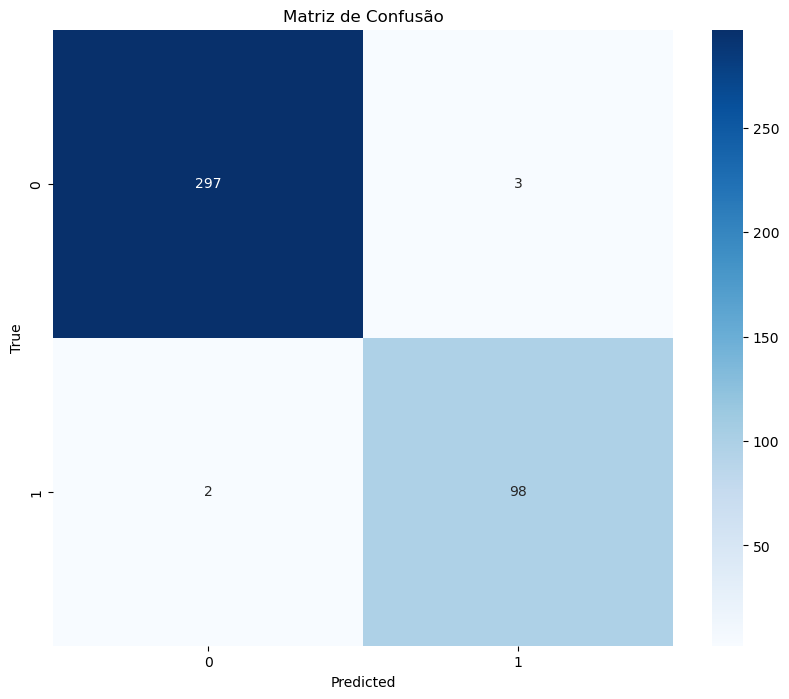

In [22]:
# 1 - para diferenciar 0 do resto 
# [1,0,0,0]

y_train_1 = np.array([1 if (x == 0) else 0 for x in y_train_filter])
y_test_1 = np.array([1 if (x == 0) else 0 for x in y_test_filter])

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
#w_1, E_1 = MGmB(x_train_filter, y_train_1, w0, eta,batch_size,epochs)
w_1, E_1 = MGE(x_train_filter, y_train_1, w0, eta,epochs)
#w_1, E_1 = MGE_Ordenado(x_train_filter, y_train_1, w0, eta,epochs)
t = list(range(len(E_1)))

# Plotando o gráfico
plt.plot(t, E_1, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_1*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_1, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)
[390]
[90]
[165]
[309]
[362]
[244]
[133]
[217]
[363]
[342]
[203]
[240]
[269]
[94]
[142]
[79]
[399]
[103]
[303]
[267]
[262]
[190]
[345]
[399]
[306]
[1]
[230]
[129]
[329]
[159]
[337]
[160]
[396]
[91]
[17]
[49]
[290]
[174]
[15]
[40]
[98]
[202]
[227]
[300]
[168]
[393]
[98]
[26]
[82]
[93]
[252]
[63]
[84]
[107]
[98]
[266]
[352]
[386]
[54]
[319]
[289]
[394]
[322]
[60]
[212]
[313]
[248]
[221]
[28]
[119]
[243]
[104]
[231]
[3]
[279]
[112]
[390]
[285]
[265]
[200]
[209]
[246]
[302]
[213]
[147]
[79]
[296]
[167]
[64]
[69]
[312]
[35]
[284]
[19]
[389]
[102]
[20]
[340]
[254]
[136]
[1]
[375]
[96]
[253]
[317]
[172]
[273]
[212]
[35]
[6]
[159]
[365]
[288]
[142]
[78]
[235]
[336]
[258]
[144]
[151]
[352]
[15]
[192]
[252]
[95]
[9]
[241]
[40]
[286]
[223]
[388]
[305]
[217]
[43]
[23]
[95]
[367]
[63]
[133]
[165]
[51]
[38]
[128]
[167]
[121]
[358]
[138]
[78]
[233]
[116]
[151]
[257]
[307]
[342]
[139]
[272]
[319]
[376]
[211]
[349]
[157]
[237]
[380]
[329]
[64]
[76]
[371]
[298]
[27]
[314]
[181]
[128]

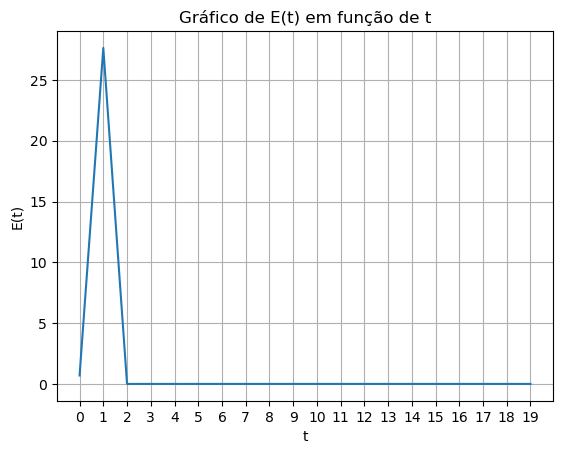

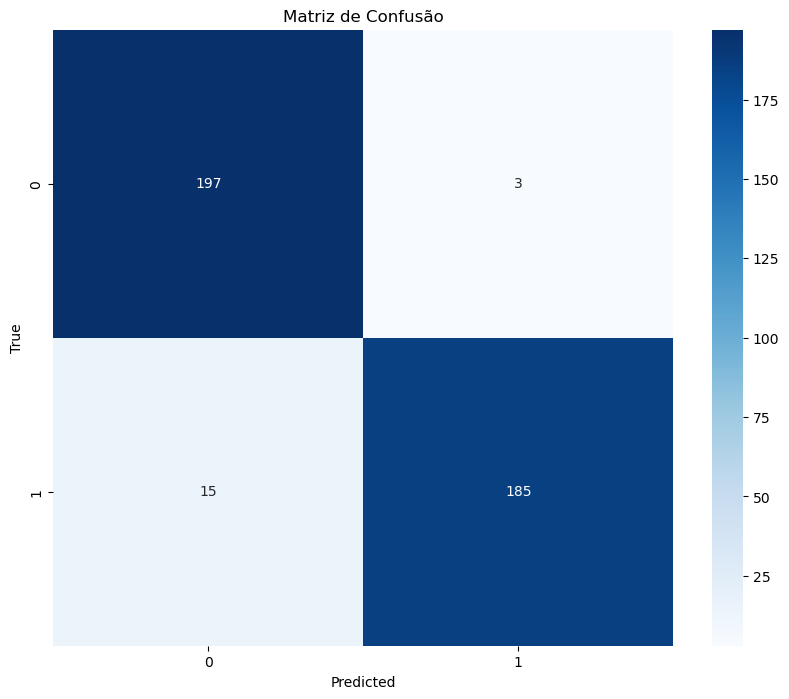

In [23]:
# 2 - para diferenciar 0 e 3 do resto 
# [1,0,0,1]

y_train_2 = np.array([1 if (x in [0,3]) else 0 for x in y_train_filter])
y_test_2 = np.array([1 if (x in [0,3]) else 0 for x in y_test_filter])

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
#w_2, E_2 = MGmB(x_train_filter, y_train_2, w0, eta,batch_size,epochs)
w_2, E_2 = MGE(x_train_filter, y_train_2, w0, eta,epochs)
#w_2, E_2 = MGE_Ordenado(x_train_filter, y_train_2, w0, eta,epochs)
t = list(range(len(E_2)))

# Plotando o gráfico
plt.plot(t, E_2, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_2*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_2, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)
[184]
[164]
[167]
[249]
[393]
[115]
[144]
[102]
[113]
[366]
[311]
[209]
[176]
[367]
[30]
[124]
[134]
[322]
[347]
[189]
[182]
[220]
[325]
[394]
[115]
[15]
[264]
[89]
[112]
[346]
[161]
[69]
[41]
[272]
[97]
[24]
[152]
[11]
[245]
[96]
[212]
[360]
[259]
[281]
[184]
[248]
[97]
[214]
[164]
[247]
[24]
[59]
[386]
[267]
[140]
[22]
[357]
[178]
[250]
[79]
[340]
[318]
[115]
[31]
[232]
[133]
[22]
[183]
[56]
[138]
[17]
[323]
[210]
[388]
[34]
[139]
[322]
[127]
[266]
[301]
[139]
[294]
[157]
[399]
[166]
[207]
[135]
[231]
[354]
[399]
[94]
[14]
[286]
[189]
[231]
[290]
[394]
[228]
[244]
[384]
[5]
[356]
[343]
[197]
[369]
[344]
[110]
[176]
[384]
[296]
[319]
[228]
[350]
[346]
[88]
[105]
[194]
[231]
[362]
[145]
[354]
[366]
[2]
[168]
[365]
[325]
[159]
[125]
[276]
[345]
[397]
[192]
[228]
[149]
[70]
[249]
[107]
[124]
[143]
[51]
[244]
[88]
[9]
[35]
[172]
[377]
[214]
[85]
[1]
[56]
[219]
[397]
[208]
[130]
[177]
[226]
[391]
[108]
[235]
[49]
[70]
[124]
[119]
[322]
[14]
[161]
[308]
[154]
[284]
[108]

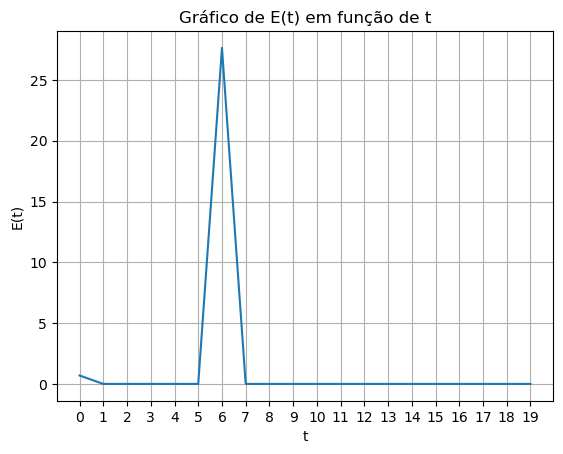

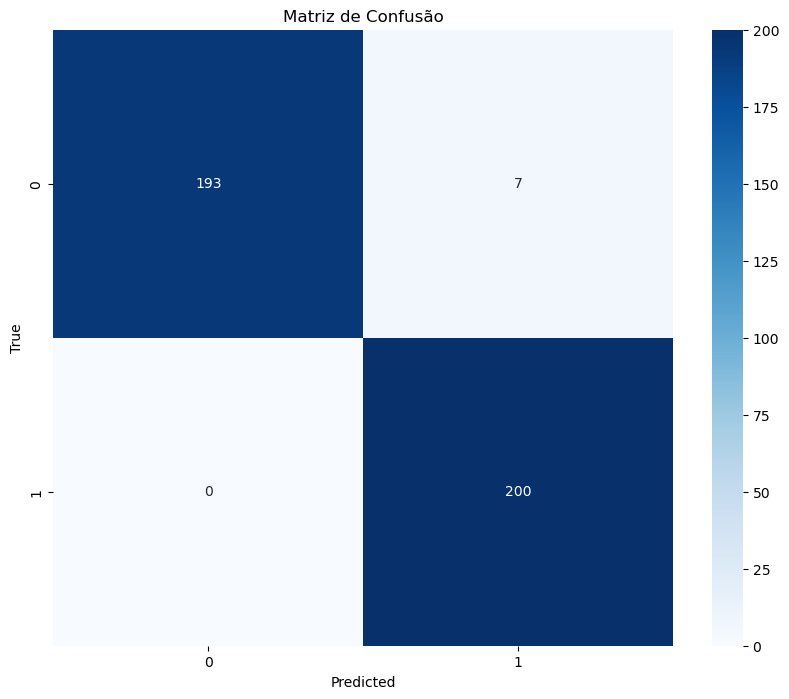

In [24]:
# 3 - [1,0,1,0]

y_train_3 = np.array([1 if (x in [0,2]) else 0 for x in y_train_filter])
y_test_3 = np.array([1 if (x in [0,2]) else 0 for x in y_test_filter])

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
#w_3, E_3 = MGmB(x_train_filter, y_train_3, w0, eta,batch_size,epochs)
w_3, E_3 = MGE(x_train_filter, y_train_3, w0, eta,epochs)
#w_3, E_3 = MGE_Ordenado(x_train_filter, y_train_3, w0, eta,epochs)
t = list(range(len(E_3)))

# Plotando o gráfico
plt.plot(t, E_3, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_3*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_3, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)
[93]
[213]
[272]
[357]
[279]
[209]
[354]
[371]
[355]
[232]
[179]
[355]
[258]
[147]
[169]
[177]
[374]
[151]
[180]
[105]
[183]
[396]
[118]
[7]
[101]
[271]
[113]
[18]
[134]
[53]
[330]
[103]
[306]
[176]
[15]
[364]
[107]
[5]
[18]
[149]
[199]
[234]
[175]
[163]
[119]
[111]
[364]
[192]
[108]
[77]
[127]
[116]
[171]
[314]
[158]
[121]
[142]
[355]
[235]
[369]
[123]
[139]
[145]
[208]
[71]
[147]
[279]
[167]
[57]
[251]
[283]
[7]
[125]
[393]
[338]
[319]
[292]
[13]
[249]
[329]
[228]
[190]
[340]
[283]
[132]
[193]
[125]
[360]
[117]
[84]
[201]
[210]
[231]
[246]
[133]
[252]
[95]
[165]
[245]
[341]
[216]
[337]
[83]
[244]
[359]
[206]
[213]
[398]
[258]
[350]
[77]
[76]
[63]
[224]
[274]
[298]
[23]
[311]
[76]
[305]
[14]
[103]
[8]
[230]
[31]
[40]
[364]
[261]
[297]
[35]
[53]
[319]
[352]
[11]
[373]
[334]
[310]
[301]
[203]
[337]
[277]
[396]
[107]
[371]
[385]
[111]
[30]
[153]
[166]
[6]
[124]
[25]
[156]
[6]
[241]
[345]
[394]
[391]
[134]
[141]
[242]
[185]
[285]
[198]
[255]
[286]
[294]
[107]
[135]
[30

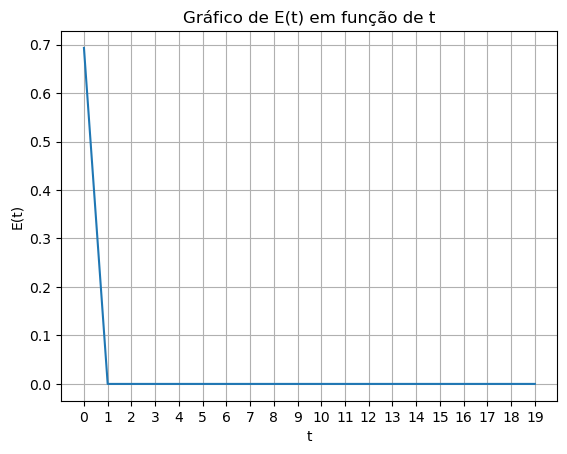

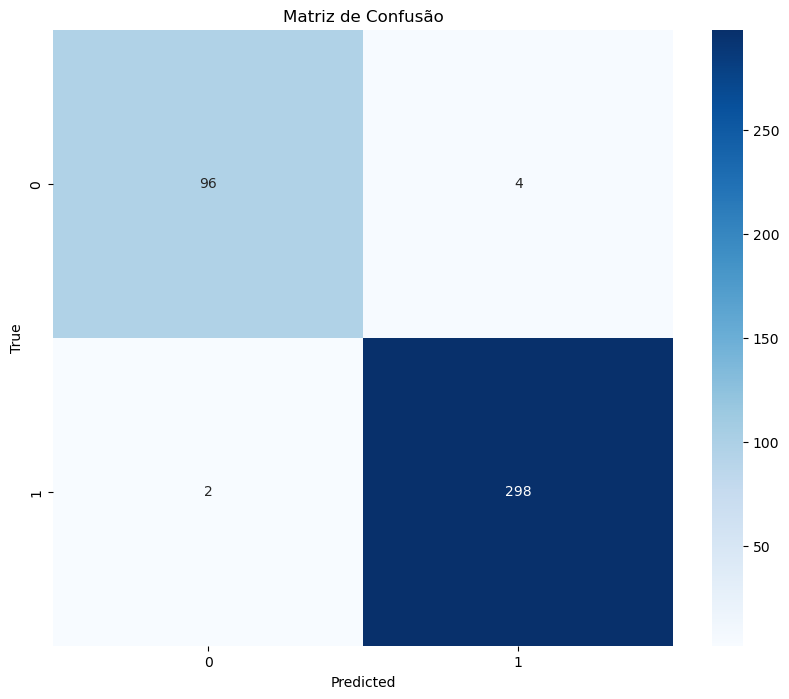

In [25]:
# 4 - [1,0,1,1]

y_train_4 = np.array([1 if (x in [0,2,3]) else 0 for x in y_train_filter])
y_test_4 = np.array([1 if (x in [0,2,3]) else 0 for x in y_test_filter])

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
#w_4, E_4 = MGmB(x_train_filter, y_train_4, w0, eta,batch_size,epochs)
w_4, E_4 = MGE(x_train_filter, y_train_4, w0, eta,epochs)
#w_4, E_4 = MGE_Ordenado(x_train_filter, y_train_4, w0, eta,epochs)
t = list(range(len(E_4)))

# Plotando o gráfico
plt.plot(t, E_4, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_4*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_4, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)
[44]
[310]
[161]
[245]
[12]
[330]
[87]
[144]
[71]
[216]
[242]
[217]
[51]
[161]
[106]
[95]
[390]
[165]
[284]
[319]
[22]
[222]
[367]
[3]
[26]
[360]
[272]
[198]
[62]
[219]
[204]
[137]
[127]
[172]
[139]
[71]
[369]
[80]
[175]
[209]
[214]
[308]
[265]
[265]
[32]
[226]
[143]
[72]
[253]
[231]
[348]
[301]
[222]
[373]
[11]
[7]
[151]
[324]
[102]
[32]
[293]
[29]
[100]
[165]
[55]
[18]
[361]
[148]
[92]
[46]
[145]
[199]
[43]
[58]
[197]
[399]
[153]
[160]
[359]
[148]
[179]
[338]
[169]
[277]
[28]
[136]
[6]
[385]
[223]
[133]
[205]
[65]
[233]
[215]
[199]
[162]
[52]
[202]
[119]
[363]
[53]
[255]
[187]
[199]
[359]
[209]
[268]
[149]
[136]
[49]
[388]
[160]
[302]
[150]
[86]
[159]
[359]
[101]
[22]
[273]
[388]
[323]
[77]
[10]
[352]
[324]
[219]
[238]
[246]
[56]
[69]
[74]
[277]
[341]
[376]
[391]
[361]
[47]
[224]
[237]
[115]
[239]
[41]
[230]
[118]
[267]
[204]
[18]
[364]
[71]
[311]
[84]
[257]
[377]
[77]
[349]
[116]
[215]
[294]
[122]
[286]
[226]
[270]
[264]
[131]
[65]
[360]
[244]
[384]
[12]
[273]
[1

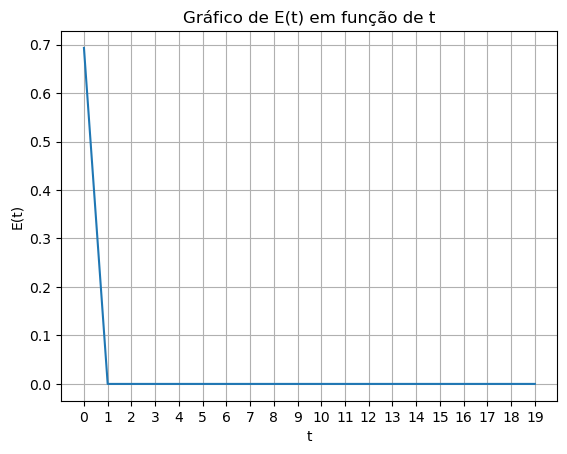

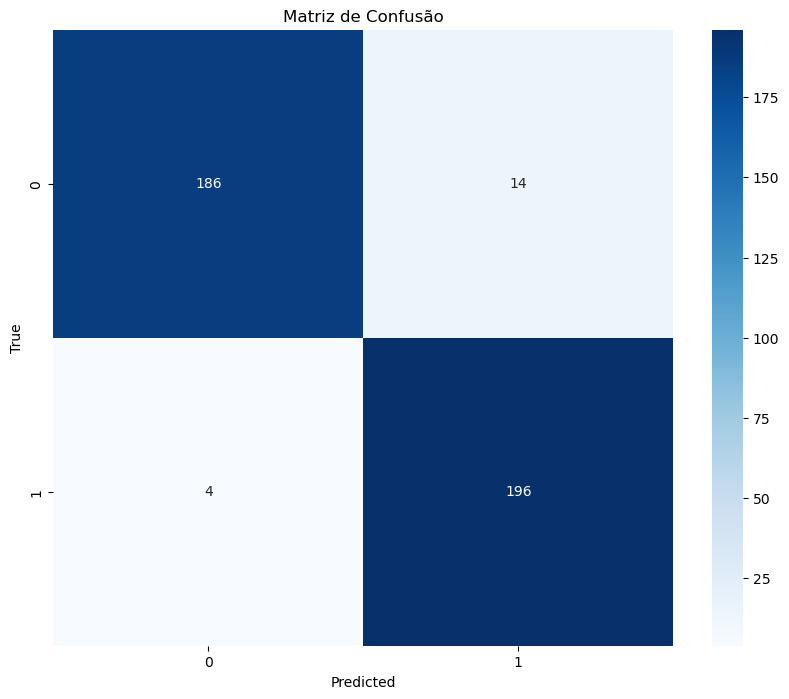

In [26]:
# 5 - [1,1,0,0]

y_train_5 = np.array([1 if (x in [0,1]) else 0 for x in y_train_filter])
y_test_5 = np.array([1 if (x in [0,1]) else 0 for x in y_test_filter])

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
#w_5, E_5 = MGmB(x_train_filter, y_train_5, w0, eta,batch_size,epochs)
w_5, E_5 = MGE(x_train_filter, y_train_5, w0, eta,epochs)
#w_5, E_5 = MGE_Ordenado(x_train_filter, y_train_5, w0, eta,epochs)
t = list(range(len(E_5)))

# Plotando o gráfico
plt.plot(t, E_5, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_5*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_5, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)
[219]
[63]
[94]
[10]
[383]
[160]
[69]
[254]
[395]
[280]
[68]
[197]
[161]
[352]
[237]
[295]
[34]
[66]
[231]
[329]
[5]
[329]
[389]
[230]
[338]
[46]
[247]
[302]
[60]
[10]
[383]
[164]
[52]
[125]
[245]
[368]
[234]
[209]
[169]
[136]
[275]
[269]
[99]
[335]
[138]
[115]
[100]
[105]
[161]
[242]
[18]
[128]
[356]
[193]
[262]
[143]
[200]
[85]
[10]
[380]
[335]
[280]
[180]
[249]
[140]
[276]
[225]
[377]
[82]
[54]
[363]
[325]
[146]
[26]
[30]
[129]
[15]
[56]
[384]
[78]
[35]
[301]
[277]
[71]
[234]
[3]
[58]
[110]
[140]
[341]
[66]
[133]
[234]
[280]
[130]
[200]
[167]
[12]
[173]
[364]
[361]
[213]
[168]
[212]
[342]
[359]
[5]
[277]
[2]
[93]
[152]
[172]
[189]
[330]
[359]
[376]
[189]
[98]
[134]
[172]
[172]
[196]
[196]
[67]
[24]
[168]
[139]
[154]
[290]
[82]
[32]
[264]
[276]
[355]
[3]
[56]
[72]
[185]
[245]
[182]
[382]
[318]
[36]
[139]
[117]
[204]
[242]
[394]
[76]
[260]
[264]
[35]
[178]
[390]
[134]
[68]
[79]
[165]
[150]
[87]
[4]
[3]
[387]
[269]
[258]
[299]
[264]
[34]
[395]
[265]
[314]
[295]
[222

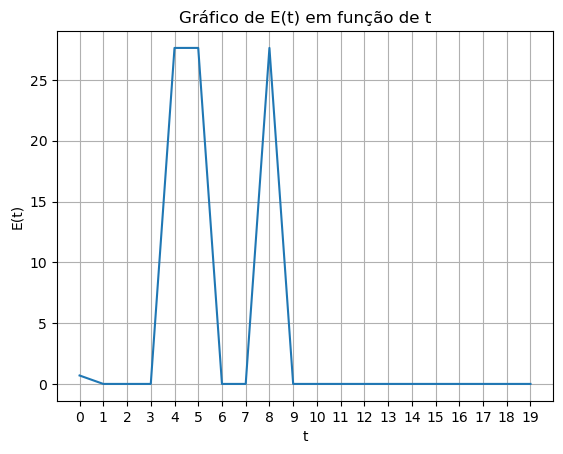

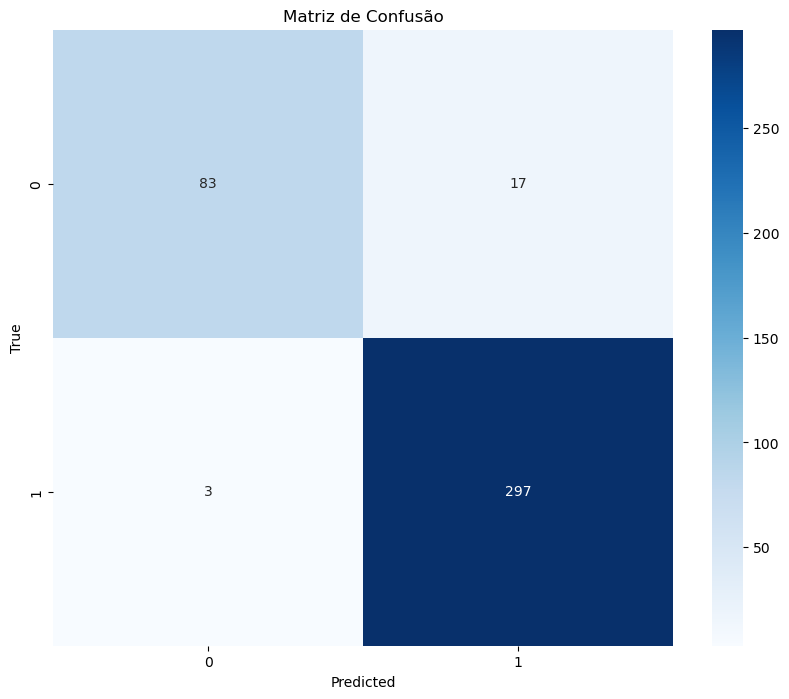

In [27]:
# 6 - [1,1,0,1]

y_train_6 = np.array([1 if (x in [0,1,3]) else 0 for x in y_train_filter])
y_test_6 = np.array([1 if (x in [0,1,3]) else 0 for x in y_test_filter])

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
#w_6, E_6 = MGmB(x_train_filter, y_train_6, w0, eta,batch_size,epochs)
w_6, E_6 = MGE(x_train_filter, y_train_6, w0, eta,epochs)
#w_6, E_6 = MGE_Ordenado(x_train_filter, y_train_6, w0, eta,epochs)
t = list(range(len(E_6)))

# Plotando o gráfico
plt.plot(t, E_6, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()
A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_6*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_6, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)
[361]
[389]
[379]
[227]
[271]
[208]
[245]
[73]
[29]
[138]
[125]
[71]
[377]
[228]
[285]
[112]
[344]
[135]
[212]
[28]
[296]
[315]
[327]
[277]
[110]
[394]
[274]
[31]
[193]
[329]
[313]
[355]
[284]
[38]
[185]
[246]
[36]
[244]
[195]
[105]
[150]
[313]
[280]
[92]
[190]
[280]
[172]
[374]
[236]
[321]
[306]
[123]
[217]
[76]
[375]
[368]
[196]
[142]
[312]
[20]
[354]
[91]
[249]
[8]
[306]
[18]
[377]
[154]
[169]
[226]
[54]
[204]
[327]
[237]
[286]
[259]
[47]
[69]
[155]
[168]
[200]
[95]
[27]
[27]
[360]
[166]
[160]
[363]
[216]
[247]
[329]
[181]
[218]
[270]
[103]
[109]
[11]
[236]
[329]
[103]
[144]
[84]
[286]
[103]
[13]
[130]
[88]
[204]
[179]
[174]
[28]
[71]
[330]
[232]
[324]
[220]
[215]
[37]
[125]
[31]
[28]
[335]
[23]
[381]
[230]
[208]
[85]
[367]
[18]
[108]
[154]
[307]
[221]
[1]
[196]
[8]
[361]
[315]
[105]
[279]
[330]
[156]
[8]
[66]
[199]
[175]
[293]
[109]
[11]
[281]
[0]
[194]
[45]
[26]
[301]
[332]
[349]
[240]
[94]
[278]
[44]
[262]
[216]
[240]
[46]
[197]
[293]
[36]
[237]
[55]
[256]
[20

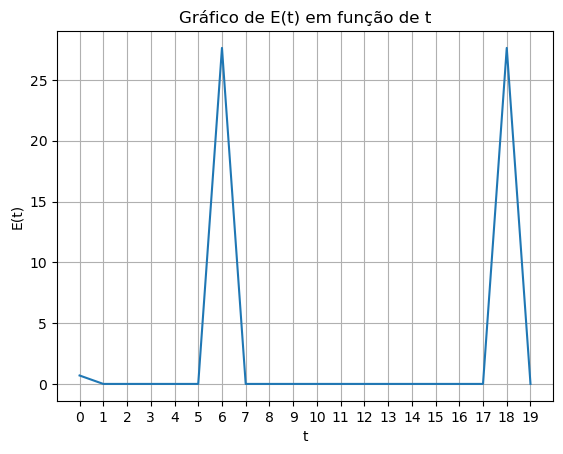

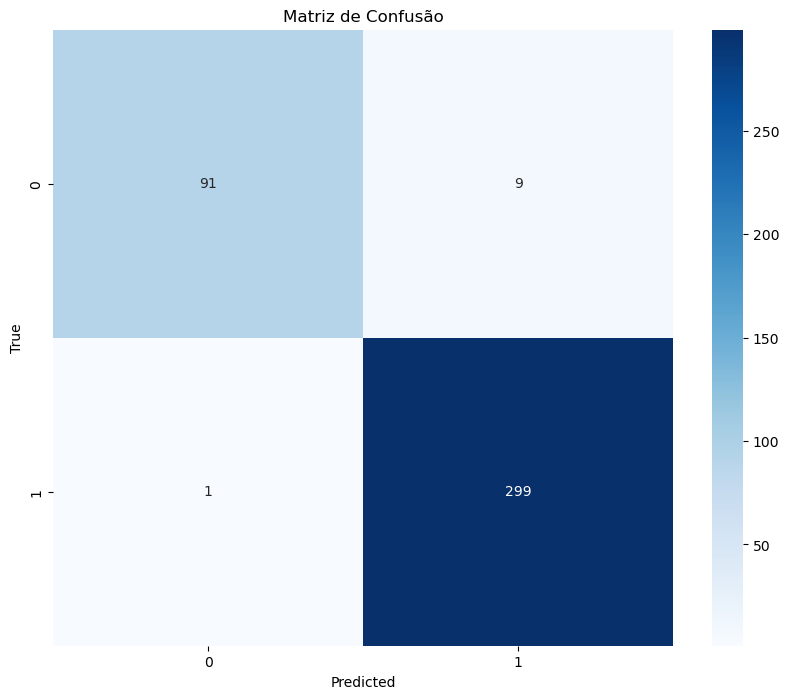

In [28]:
# 7 - [1,1,1,0]

y_train_7 = np.array([1 if (x in [0,1,2]) else 0 for x in y_train_filter])
y_test_7 = np.array([1 if (x in [0,1,2]) else 0 for x in y_test_filter])

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
#w_7, E_7 = MGmB(x_train_filter, y_train_7, w0, eta,batch_size,epochs)
w_7, E_7 = MGE(x_train_filter, y_train_7, w0, eta,epochs)
#w_7, E_7 = MGE_Ordenado(x_train_filter, y_train_7, w0, eta,epochs)
t = list(range(len(E_7)))

# Plotando o gráfico
plt.plot(t, E_7, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_7*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_7, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
previsoes = []
for i in range(len(x_test_filter)):
    elemento = x_test_filter[i]
    p_chapeu_1 = threshold(sigmoid(np.dot(w_1,elemento)))
    p_chapeu_2 = threshold(sigmoid(np.dot(w_2,elemento)))
    p_chapeu_3 = threshold(sigmoid(np.dot(w_3,elemento)))
    p_chapeu_4 = threshold(sigmoid(np.dot(w_4,elemento)))
    p_chapeu_5 = threshold(sigmoid(np.dot(w_5,elemento)))
    p_chapeu_6 = threshold(sigmoid(np.dot(w_6,elemento)))
    p_chapeu_7 = threshold(sigmoid(np.dot(w_7,elemento)))

    distancia = [0.0, 0.0, 0.0, 0.0]

    concate_p_chapeu =  [p_chapeu_1, p_chapeu_2, p_chapeu_3, p_chapeu_4, p_chapeu_5, p_chapeu_6, p_chapeu_7]

    for m in range(4):
        distancia[m] += sum(el1 != el2 for el1, el2 in zip(concate_p_chapeu, code[m]))

    a=(np.argmin(distancia))
    previsoes.append(a)

    '''
    print(f"{a}, {y_test_filter[i]}")

    if a == y_test_filter[i]:
        print("ACERTOU")
    else:
        print("ERRADO")
    '''

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.90


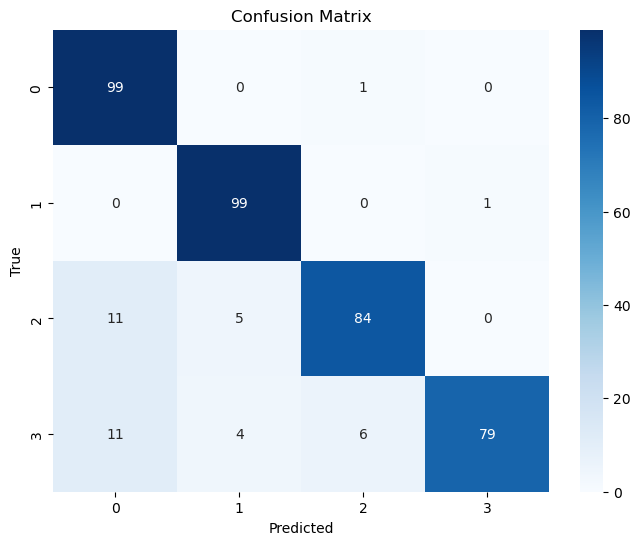

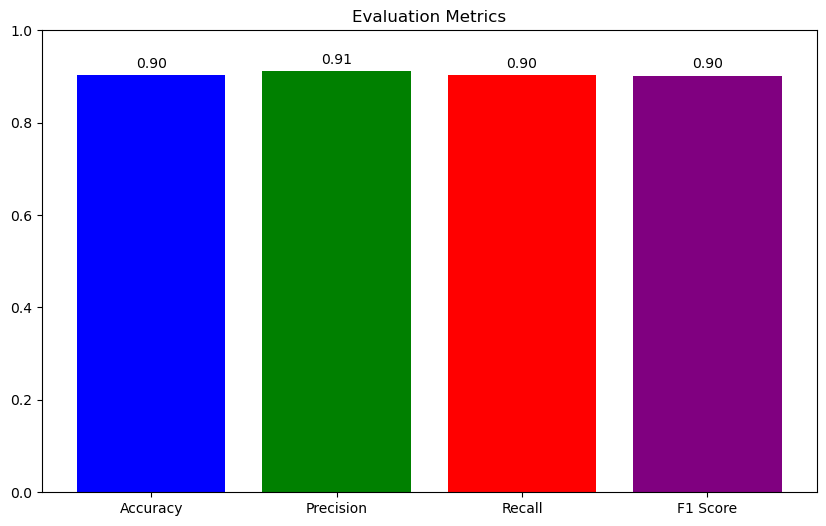


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.82      0.99      0.90       100
     Class 1       0.92      0.99      0.95       100
     Class 2       0.92      0.84      0.88       100
     Class 3       0.99      0.79      0.88       100

    accuracy                           0.90       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.91      0.90      0.90       400



In [30]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que Y_testes e previsoes já estejam definidos
# Y_testes = np.array([...])
# previsoes = np.array([...])

# Calculando as métricas
accuracy = accuracy_score(y_test_filter, previsoes)
precision = precision_score(y_test_filter, previsoes, average='macro')
recall = recall_score(y_test_filter, previsoes, average='macro')
f1 = f1_score(y_test_filter, previsoes, average='macro')

# Imprimindo as métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test_filter, previsoes)

# Gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_filter), yticklabels=np.unique(y_test_filter))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Gráfico das métricas
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')

# Adicionando os valores a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

# Nomes das classes dinamicamente
classes = np.unique(y_test_filter)
class_names = [f'Class {cls}' for cls in classes]

# Relatório de classificação completo
report = classification_report(y_test_filter, previsoes, target_names=class_names)
print('\nClassification Report:\n', report)
